<a href="https://colab.research.google.com/github/BhavanaTungala/real_estate_analytics/blob/main/Employee_dataset_regression_model_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Employee_ID   Age Department  Experience_Years     Salary  \
0            1   NaN  Marketing                10  6513500.0   
1            2  51.0         HR                 4    33292.0   
2            3  55.0  Marketing                 0    61060.0   
3            4  58.0         IT                16    67116.0   
4            5   NaN  Marketing                21    74512.0   

   Performance_Score  Work_Hours  Projects_Handled  Satisfaction_Level  \
0                  2  142.713522                12                0.75   
1                  1   34.805701                 4               -0.50   
2                  2  713.567610                 9                0.58   
3                999   40.824551                 1                 NaN   
4                -50   36.528210                13                0.44   

   Promotions  
0           2  
1           4  
2           3  
3           4  
4           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Dat

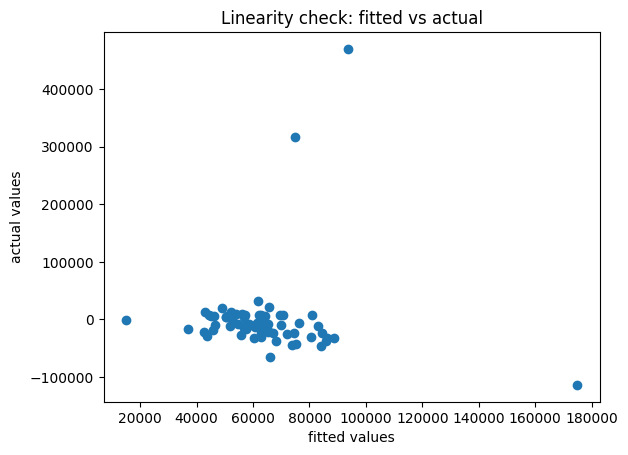

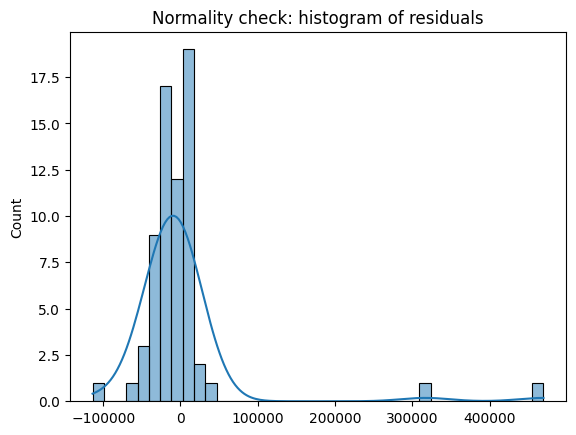

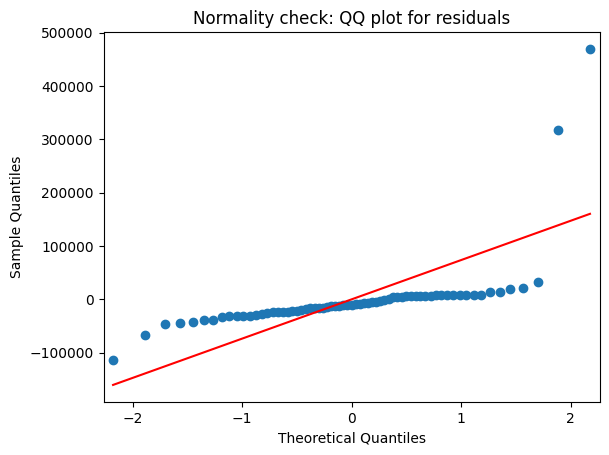

Shapiro-Wilk Test p-value: 8.916589011035011e-15
Residuals are NOT normally distributed


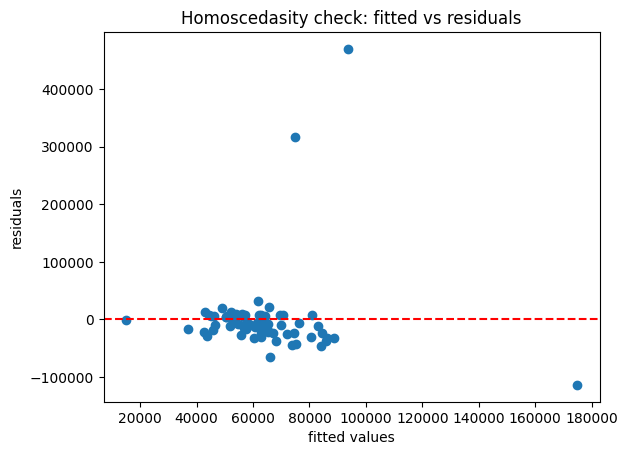

Breusch-Pagan Test p-value:, 0.7563448729173098
Residuals are homoscedastic
Durbin-Watson Test Statistic: 2.0028624579483276
Residuals are independent
              feature        VIF
0               const  37.073148
1         Employee_ID   1.081243
2                 Age   1.080312
3    Experience_Years   1.127252
4   Performance_Score   1.094656
5          Work_Hours   1.099710
6    Projects_Handled   1.311894
7  Satisfaction_Level   1.253763
8          Promotions   1.079672


In [32]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# --- Ste 2: Load Dataset ---
df = pd.read_excel("/content/fictional_employee_dataset_with_outliers (1).xlsx")

# View Data info
print(df.head())
print(df.info())

# --- Step 3: Data Cleaning ---
# Drop non-numeric or irrelavant columns from regression
df = df.select_dtypes(include=[np.number]).dropna()


# --- Step 4: Define dependent and independent variable ---
y = df['Salary']
x = df.drop(columns=['Salary'])
x = sm.add_constant(x)
# Add intercept

# --- Step 5: Fit the regression model ---
model = sm.OLS(y, x).fit()
print(model.summary())

# --- Step 6: Get residuals and fitted values ---
residuals = model.resid
fitted = model.fittedvalues

# --- Step 7: Check assumptions ---

## 1: Linearity
plt.scatter(fitted, residuals)
plt.xlabel("fitted values")
plt.ylabel("actual values")
plt.title("Linearity check: fitted vs actual")
plt.show()


## 2: Normality of residuals
sns.histplot(residuals, kde=True)
plt.title("Normality check: histogram of residuals")
plt.show()

sm.qqplot(residuals, line="s")
plt.title("Normality check: QQ plot for residuals")
plt.show()

shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)
if shapiro_test.pvalue > 0.05:
  print("Residuals are normally distributed")
else:
  print("Residuals are NOT normally distributed")


## 3: Homoscedasticity (equal variance)
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.title("Homoscedasity check: fitted vs residuals")
plt.show()

bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, model.model.exog)
print(f"Breusch-Pagan Test p-value:, {bp_test[1]}")
if bp_test[1] > 0.05:
  print("Residuals are homoscedastic")
else:
  print("Residuals are NOT homoscedastic")


## 4: Independance of errors (Durbin_watson)
dw = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson Test Statistic:", dw)
if dw < 2.5:
  print("Residuals are independent")
else:
  print("Residuals are NOT independent")


## 5: Multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_data)